In [ ]:
!pip install pandas mlxtend
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules as rulesmlx
from mlxtend.frequent_patterns import fpgrowth, association_rules as ruleslfpg
import matplotlib.pyplot as plt
import networkx as nx

df = pd.read_csv('/content/sample_data/Asignmentpart1_Dataset_section7_0363833.csv')

#Setup for the viewing tables
desired_width = 15000
pd.set_option('display.width', desired_width)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
np.set_printoptions(linewidth=desired_width)

# Implementation of Apriori Algorithm


In [ ]:
drugs = ['Heroin',
        'Cocaine', 'Fentanyl',
       'Fentanyl_Analogue', 'Oxycodone', 'Oxymorphone', 'Ethanol',
       'Hydrocodone', 'Benzodiazepine', 'Methadone', 'Meth/Amphetamine',
       'Amphet', 'Tramad', 'Hydromorphone', 'Morphine_(Not_Heroin)',
       'Xylazine', 'Gabapentin', 'Opiate_NOS', 'Heroin/Morph/Codeine']

df_drugs = df[drugs]

In [ ]:
df_drugs = df_drugs.applymap(lambda x: 1 if x == 'Yes' else 0)

print(df_drugs.head(10))

<ipython-input-20-32ddc188e7f1>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_drugs = df_drugs.applymap(lambda x: 1 if x == 'Yes' else 0)


   Heroin  Cocaine  Fentanyl  Fentanyl_Analogue  Oxycodone  Oxymorphone  Ethanol  Hydrocodone  Benzodiazepine  Methadone  Meth/Amphetamine  Amphet  Tramad  Hydromorphone  Morphine_(Not_Heroin)  Xylazine  Gabapentin  Opiate_NOS  Heroin/Morph/Codeine
0       0        1         0                  0          0            0        0            0               0          0                 0       0       0              0                      0         0           0           0                     0
1       1        0         0                  0          0            0        0            0               0          0                 0       0       0              0                      0         0           0           0                     0
2       1        0         0                  0          0            0        0            0               0          0                 0       0       0              0                      0         0           0           0                     0
3   

In [ ]:
frequent_items=apriori(df_drugs, min_support=0.05, use_colnames=True)
frequent_items = frequent_items.sort_values(by='support', ascending=False)
print("Frequent Itemset for Apriori Algorith:\n", frequent_items)

Frequent Itemset for Apriori Algorith:
      support                                  itemsets
2   0.671675                                (Fentanyl)
1   0.382169                                 (Cocaine)
0   0.298606                                  (Heroin)
15  0.277319                       (Cocaine, Fentanyl)
5   0.267218                                 (Ethanol)
6   0.226814                          (Benzodiazepine)
9   0.183738                    (Heroin/Morph/Codeine)
20  0.181568                       (Fentanyl, Ethanol)
14  0.173804            (Heroin/Morph/Codeine, Heroin)
11  0.168545                        (Heroin, Fentanyl)
21  0.133484                (Fentanyl, Benzodiazepine)
23  0.118374          (Heroin/Morph/Codeine, Fentanyl)
27  0.116370  (Heroin/Morph/Codeine, Heroin, Fentanyl)
10  0.095417                         (Cocaine, Heroin)
16  0.095334                        (Cocaine, Ethanol)
8   0.089991                                (Xylazine)
7   0.089991             

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [ ]:
rules = rulesmlx(frequent_items, metric="confidence", min_threshold=0.6)
rules = rules.sort_values(['confidence','lift'], ascending=[False,False])
print("Show Itemset which has confidence (>=60%):\n", rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(4))

Show Itemset which has confidence (>=60%):
                          antecedents             consequents  support  confidence    lift
8                         (Xylazine)              (Fentanyl)   0.0897      0.9963  1.4833
9                (Fentanyl_Analogue)              (Fentanyl)   0.0803      0.9877  1.4705
5   (Heroin/Morph/Codeine, Fentanyl)                (Heroin)   0.1164      0.9831  3.2922
12   (Cocaine, Heroin/Morph/Codeine)                (Heroin)   0.0568      0.9798  3.2813
2             (Heroin/Morph/Codeine)                (Heroin)   0.1738      0.9459  3.1678
10                (Cocaine, Ethanol)              (Fentanyl)   0.0730      0.7653  1.1394
0                          (Cocaine)              (Fentanyl)   0.2773      0.7256  1.0803
6                 (Heroin, Fentanyl)  (Heroin/Morph/Codeine)   0.1164      0.6904  3.7577
1                          (Ethanol)              (Fentanyl)   0.1816      0.6795  1.0116
4     (Heroin/Morph/Codeine, Heroin)              (Fenta

# Implementation of FP Algorithm:

In [ ]:
df_boolean = df_drugs.astype(bool)

In [ ]:
frequent_items_fp = fpgrowth(df_boolean, min_support=0.05, use_colnames=True)
frequent_items_fp = frequent_items.sort_values(by='support', ascending=False)
print("Frequent Itemset for FP Algorithm:\n", frequent_items_fp)

Frequent Itemset for FP Algorithm:
      support                                  itemsets
2   0.671675                                (Fentanyl)
1   0.382169                                 (Cocaine)
0   0.298606                                  (Heroin)
15  0.277319                       (Cocaine, Fentanyl)
5   0.267218                                 (Ethanol)
6   0.226814                          (Benzodiazepine)
9   0.183738                    (Heroin/Morph/Codeine)
20  0.181568                       (Fentanyl, Ethanol)
14  0.173804            (Heroin/Morph/Codeine, Heroin)
11  0.168545                        (Heroin, Fentanyl)
21  0.133484                (Fentanyl, Benzodiazepine)
23  0.118374          (Heroin/Morph/Codeine, Fentanyl)
27  0.116370  (Heroin/Morph/Codeine, Heroin, Fentanyl)
10  0.095417                         (Cocaine, Heroin)
16  0.095334                        (Cocaine, Ethanol)
8   0.089991                                (Xylazine)
7   0.089991                 

In [ ]:
rules_fp = ruleslfpg(frequent_items_fp, metric="confidence", min_threshold=0.6)
rules_fp = rules_fp.sort_values(['confidence','lift'], ascending=[False,False])
print("Show Itemset  for FP Algorithm:\n", rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(4))

Show Itemset  for FP Algorithm:
                          antecedents             consequents  support  confidence    lift
8                         (Xylazine)              (Fentanyl)   0.0897      0.9963  1.4833
9                (Fentanyl_Analogue)              (Fentanyl)   0.0803      0.9877  1.4705
5   (Heroin/Morph/Codeine, Fentanyl)                (Heroin)   0.1164      0.9831  3.2922
12   (Cocaine, Heroin/Morph/Codeine)                (Heroin)   0.0568      0.9798  3.2813
2             (Heroin/Morph/Codeine)                (Heroin)   0.1738      0.9459  3.1678
10                (Cocaine, Ethanol)              (Fentanyl)   0.0730      0.7653  1.1394
0                          (Cocaine)              (Fentanyl)   0.2773      0.7256  1.0803
6                 (Heroin, Fentanyl)  (Heroin/Morph/Codeine)   0.1164      0.6904  3.7577
1                          (Ethanol)              (Fentanyl)   0.1816      0.6795  1.0116
4     (Heroin/Morph/Codeine, Heroin)              (Fentanyl)   0.11

# Summary Of Observation

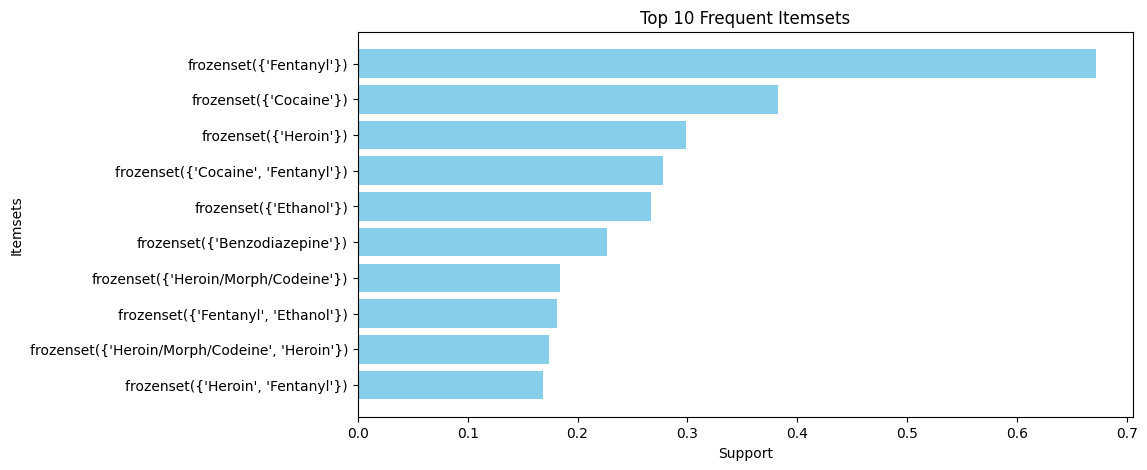

In [ ]:
plt.figure(figsize=(10, 5))
top_items = frequent_items.sort_values(by="support", ascending=False).head(10)
plt.barh(top_items['itemsets'].astype(str), top_items['support'], color='skyblue')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
strong_results = rules[(rules['lift'] >= 2) & (rules['confidence'] >= 0.7)]
print("Filtered Results:\n", strong_results[['antecedents', 'consequents', 'support', 'confidence', 'lift']].round(4))

Filtered Results:
                          antecedents consequents  support  confidence    lift
5   (Heroin/Morph/Codeine, Fentanyl)    (Heroin)   0.1164      0.9831  3.2922
12   (Cocaine, Heroin/Morph/Codeine)    (Heroin)   0.0568      0.9798  3.2813
2             (Heroin/Morph/Codeine)    (Heroin)   0.1738      0.9459  3.1678


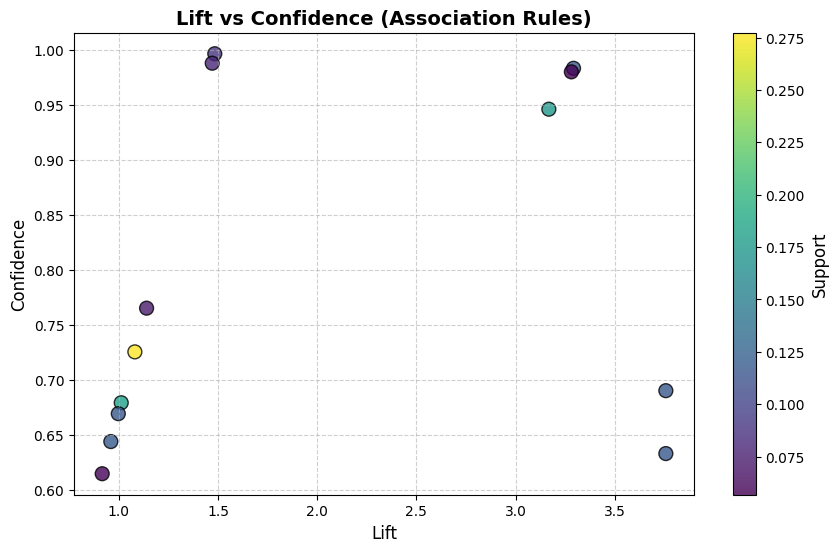

In [ ]:
plt.figure(figsize=(10, 6))
sc = plt.scatter(
    rules['lift'], rules['confidence'],
    s=100,
    alpha=0.8,
    c=rules['support'], cmap='viridis',
    edgecolors='black'
)

plt.xlabel('Lift', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.title('Lift vs Confidence (Association Rules)', fontsize=14, fontweight='bold')

cbar = plt.colorbar(sc)
cbar.set_label("Support", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

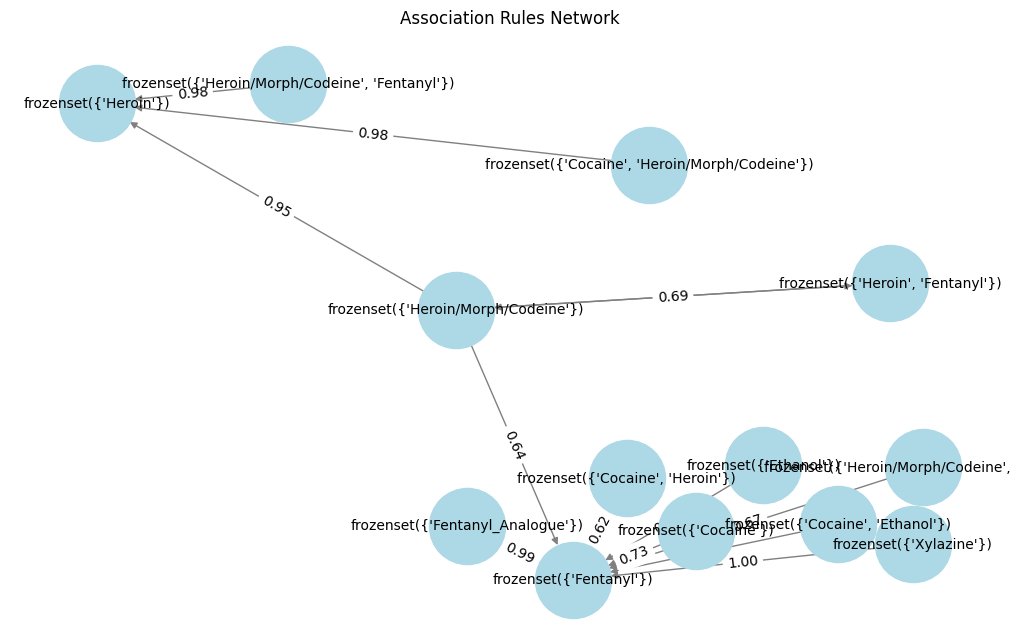

In [ ]:
G = nx.DiGraph()

# Add edges for association rules
for i, row in rules_fp.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['confidence'])

plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # Node positioning
edges = G.edges(data=True)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=3000, font_size=10)
edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Association Rules Network")
plt.show()